<a href="https://colab.research.google.com/github/MoreJignesh/6-Months-Data-Science-Roadmap-/blob/main/Statistics_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistics Practical Implementation

##Measure of Central Tendancy

1. Mean
2. Median
3. Mode


In [1]:
import numpy as np
import statistics
import seaborn as sns

In [2]:
ages = [23,24,32,26,72,55,67,48,61,16,18,26,56,91,12,65,48,37,220]

In [3]:
print(np.mean(ages))
print(np.median(ages))

52.473684210526315
48.0


###Findings

From the above we can notice that there was an outlier within the data but we can notice it in the difference of Mean and median (feature engineering).
It's clear that the mean is significantly impacted by the outlier, whereas the median remains relatively stable.

In [4]:
ages2 = [23,24,32,26,72,55,67,48,61,16,18,26,56,91,12,65,48,37]

In [5]:
print(np.mean(ages2))
print(np.median(ages2))

43.166666666666664
42.5


In [6]:
print(statistics.mean(ages))
print(statistics.median(ages))

52.473684210526315
48


In [7]:
print(statistics.mode(ages))

26


##Let's check how to identify outliers


<Axes: >

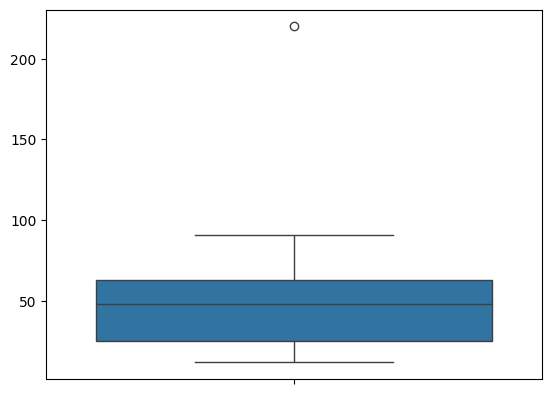

In [8]:
sns.boxplot(ages)

##Five Number Summary

In [9]:
q1, q3 = np.percentile(ages,[25,75])

print(q1,q3)

25.0 63.0


In [10]:
## to check outlier [Lower fence and Higher fence]

IQR = q3 - q1
lower_fence = q1 - 1.5*(IQR)
higher_fence = q3 + 1.5*(IQR)

print(lower_fence,higher_fence)

-32.0 120.0


### Findings
 Based on this we got the lower_fence and higher_fence, any number outside of this range is considered as outlier

#Measure of Dispersion

1. Variance
2. Standard Deviation

In [11]:
#Calculating Variance (sample (n-1))

statistics.variance(ages)

2129.2631578947367

In [12]:
# Calculating Population Variance
np.var(ages,axis = 0)

2017.1966759002771

In [13]:
#cross confirming variance (population = 0 , sample = 1)

def variance(data,dof = 1):
  n = len(ages)

  #mean of the data

  mean = sum (data)/n

  #variance
  deviation = [(x - mean) ** 2 for x in data]
  variance = sum(deviation)/(n - dof)

  return variance



In [14]:
variance(ages,dof = 0)

2017.1966759002771

In [15]:
variance(ages,dof = 1)

2129.263157894737

In [16]:
statistics.pvariance(ages)

2017.1966759002771

In [17]:
import math
std = math.sqrt(statistics.pvariance(ages))

print(std)

44.91321270962786


#Histogram and PDF (frequency)

<Axes: ylabel='Count'>

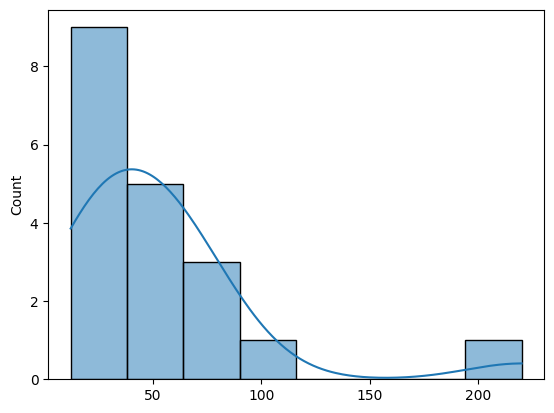

In [18]:
#kde = kernel density estimate

sns.histplot(ages,kde = True)

CHeck how to identify the outliers in our dataset

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
##Defining our dataset

dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,12,10,14,13,15,10]

(array([29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

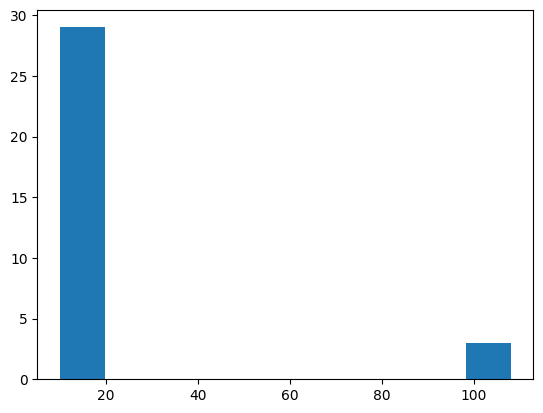

In [21]:
##this way you can notice the outliers, however not the most accurate way.
plt.hist(dataset)

In [22]:
#dectecting outliers using Z_score
def detect_outliers(data):
  outliers = []
  threshold = 3 #3rd standard deviation
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers


In [23]:
detect_outliers(dataset)

[107, 108]

IOQ Technique (most accurate way) - Feature engineering
  1. Sort the data
  2. Calculate Q1 (25%) and Q3(75%)
  3. IQR (Q3-Q1)
  4. Find the lower fence (Q1-1.5(IQR))
  5. Find the lower fence (Q3+1.5(IQR))


In [24]:
#sorting data in assending order and calculating the necessary fields
dataset = sorted(dataset)
q1, q3 = np.percentile(dataset,[25,75])
iqr = q3 - q1

print(dataset,q1,q3,iqr)

[10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 17, 19, 102, 107, 108] 12.0 15.0 3.0


In [25]:
#calculating lower and upper fence
lower_fence = q1-1.5*iqr
upper_fence = q3+1.5*iqr

print(lower_fence, upper_fence)

7.5 19.5


<Axes: >

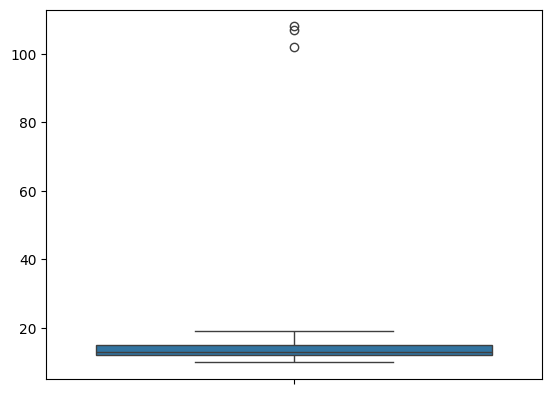

In [26]:
sns.boxplot(dataset)

As you can notice the IQR way was most accrate way of identifying the outliers, were it has provided us 3 outliers and previous one was not the accurate because it has just provided 2 of them instead of 3.

#NORMAL DISTRIBUTION
# Lets create a normal distribution

In [27]:
# Creating data points for normal distribution
s = np.random.normal(0.5,0.2,1000)

#checking the data points
s


array([ 0.66244759,  0.21658689,  0.39419775,  0.5473004 ,  0.21148322,
        0.46156287,  0.69664891,  0.69248885,  0.56259518,  0.4989621 ,
        0.29788623,  0.48382838,  0.28745363,  0.42558916,  0.40477329,
        0.62112695,  0.37544977,  0.22681479,  0.30778413,  0.39240996,
        0.46789226,  0.55732308,  0.17191169,  0.49520464,  0.32230803,
        0.29706685,  0.90083712,  0.28671317,  0.67576589,  0.26081814,
        0.7819062 ,  0.44405993,  0.52772704,  0.44365355, -0.02040574,
        0.18124258,  0.61619283,  0.52554071,  0.52818113,  0.44129802,
        0.47598411,  0.52925777,  0.486842  ,  0.37811737,  0.50619851,
        0.45257029,  0.46905854,  0.3332268 ,  0.52435966,  0.53571132,
        0.5745456 ,  0.30777536,  0.35225946,  0.59986482,  0.50534517,
        0.24641272,  0.85632363,  0.25117719,  0.45325013,  0.64302108,
        0.49185522,  0.43876097,  0.3803687 ,  0.65957216,  0.71755795,
        0.12600288,  0.54047107,  0.19918689,  0.22194419,  0.79

<Axes: ylabel='Count'>

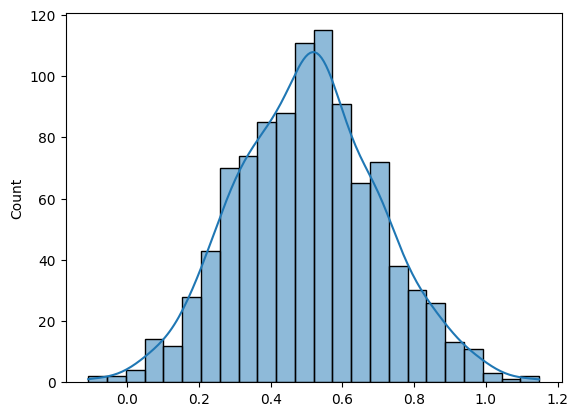

In [28]:
#checking on the graph chart

sns.histplot(s,kde=True)

#OTHER DISTRIBUTION

Log Normal Distribution, Power Law Distribution

In [29]:
#creating necessary fields

mu, signma = 3., 1. #mean and standard deviation

m = np.random.lognormal (mu, signma, 1000)

<Axes: ylabel='Count'>

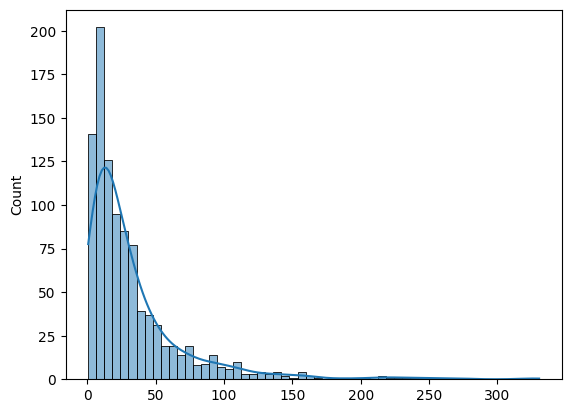

In [30]:
sns.histplot(m, kde=True)

How can we convert this Log normal distribution to Normal distribution

<Axes: ylabel='Count'>

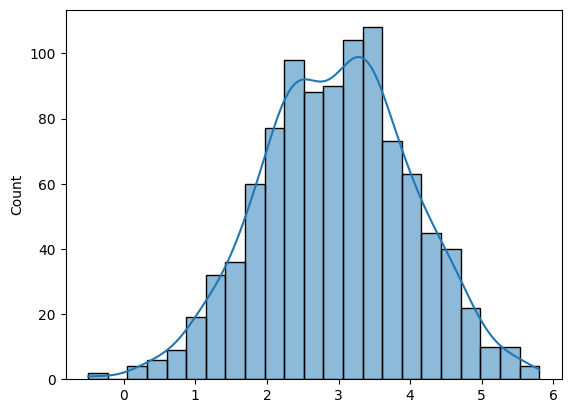

In [31]:
sns.histplot(np.log(m),kde = True)

#How to check if the distribution is normal distribution ?

In [32]:

import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

def plot_data(sample):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.histplot(sample)
  plt.subplot(1,2,2)
  stat.probplot(sample,dist='norm',plot=pylab)
  plt.show()

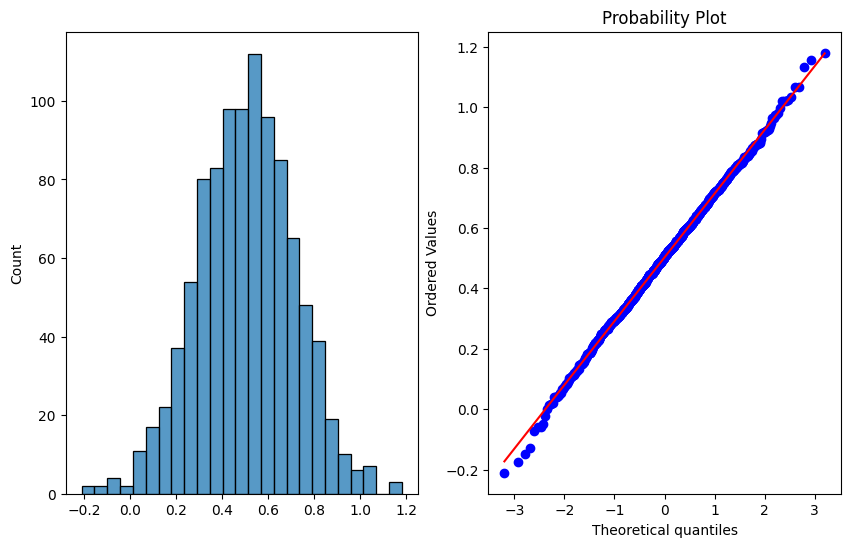

In [33]:
#create a normal distributed data.
n = np.random.normal(0.5,0.2,1000)
plot_data(n)

As you can notice in this above right chart the line is straight as per the probability plot than it means it's a normal distribution chart.

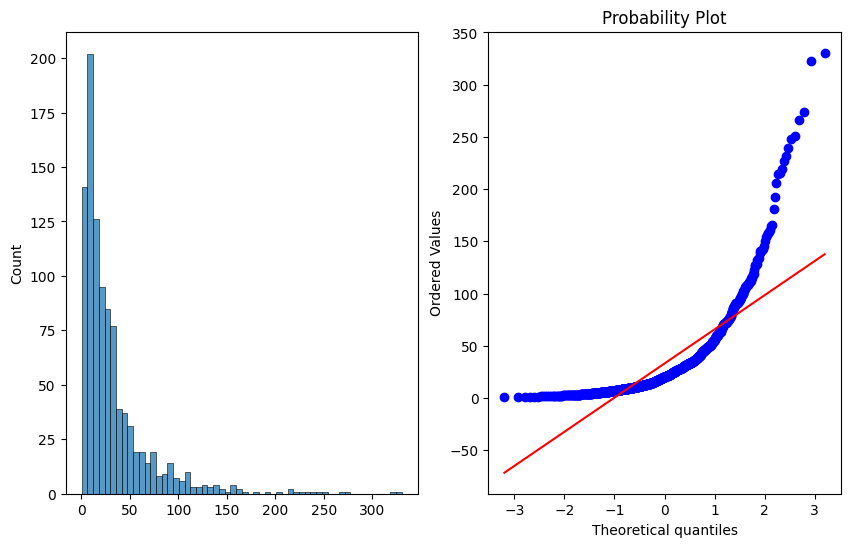

In [34]:
#same we check it with other data Eg log normal distribution
plot_data(m)

As you can see this Log normal is not a normal distribution as we already are aware, but we can achieve it by converting it to normal distrubution.

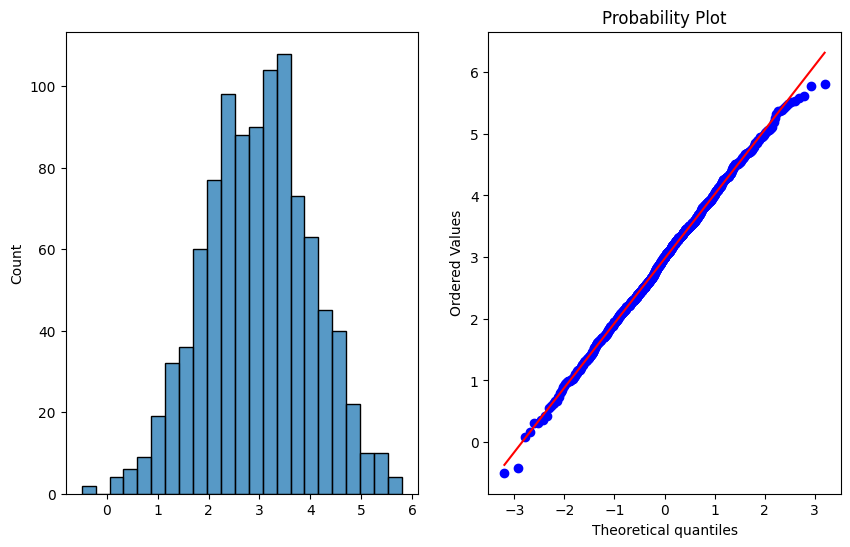

In [35]:
plot_data(np.log(m))

Pearson and Sperman Rank can be performed but we would required a data set.